## <center> Linear regression </center>

### Описание датасетов
 - restaurants.csv: содержит информацию о населении города(первое число) и прибыли ресторана в этом городе.
 - houses.csv содержит информацию о площади дома в кв. футах(первое число), количестве комнат в доме(второе число) и стоимости дома(третье число).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import time

**Задание 1.** Загрузите набор данных restaurants.csv.

In [ ]:
rests_df = pd.read_csv('restaurants.csv', names=['population', 'income'])
rests_df.head()

,population,income
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


**Задание 2.** Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.

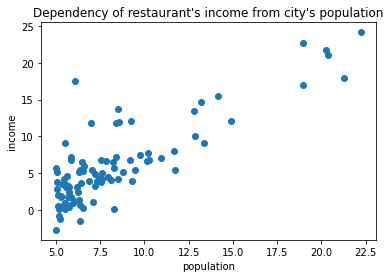

In [ ]:
plt.scatter(rests_df.population, rests_df.income)
plt.xlabel('population')
plt.ylabel('income')
plt.title("Dependency of restaurant's income from city's population")
plt.show()

**Задание 3.** Реализуйте функцию потерь MSE для набора данных restaurants.csv.

In [ ]:
def mse(y, y_pred):
    return ((y-y_pred) ** 2).mean()

In [ ]:
popul_arr = np.array(rests_df.population)
income_arr = np.array(rests_df.income)
mse(popul_arr, income_arr)

14.891711085859795

**Задание 4.** Реализуйте  функцию  градиентного  спуска  для  выбора  параметров модели.  Постройте  полученную  модель  (функцию)  совместно  с графиком из пункта 2.

Реализация функции градиентного спуска (batch) для многомерных моделей:

In [ ]:
# y_pred(x) = w1*x1 + ... + wn*xn + b

def batch_gradient_descend(X, y, epochs, learn_rate=0.01):

    n_features = X.shape[1]
    n_samples = X.shape[0]
    w = np.ones(shape=(n_features))
    b = 0

    for _ in range(epochs):
        y_pred = np.dot(w, X.T) + b
        err = y - y_pred
        w_grad = -(2/n_samples) * np.dot(X.T, err)
        b_grad = -(2/n_samples) * np.sum(err)
        w -= learn_rate * (w_grad)
        b -= learn_rate * (b_grad)
        
    return w, b

Находим параметры модели (в нашем случае f(x) = w1*x + b):

In [ ]:
popul_arr = np.array(rests_df[['population']])
income_arr = np.array(rests_df['income']) 
w, b = batch_gradient_descend(popul_arr, income_arr, 2000)
w1 = w[0]

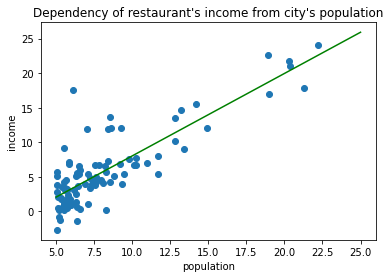

In [ ]:
plt.scatter(rests_df.population, rests_df.income)

plt.plot((5, 25), (5*w1 + b, 25*w1 + b), c='g')
plt.xlabel('population')
plt.ylabel('income')
plt.title("Dependency of restaurant's income from city's population")
plt.show()

**Задание 5.*** Постройте  трехмерный  график  зависимости  функции  потерь  от параметров  модели  ($b$ и  $w1$)  как  в  виде  поверхности,  так  и  в  виде изолиний (contour plot).

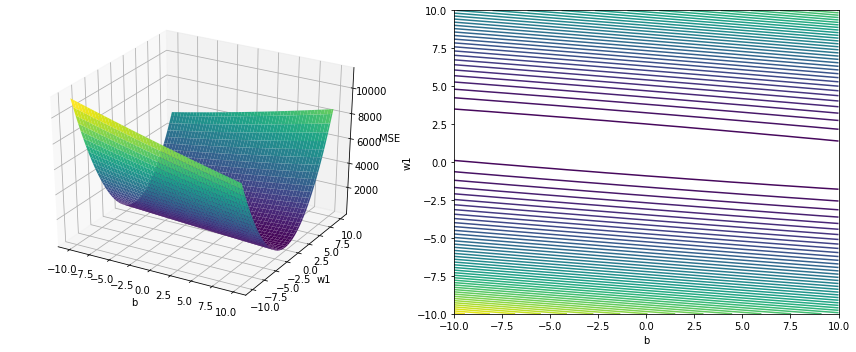

In [ ]:
def err(x, y, b, w1):
    return ((y - (w1*x + b)) ** 2).mean()

fig = plt.figure(figsize=(12, 5))
ax1 = plt.subplot(121, projection='3d')
ax2 = plt.subplot(122)
b, w1 = np.linspace(-10, 10, 100), np.linspace(-10, 10, 100)
b, w1 = np.meshgrid(b, w1)

x, y = np.array(rests_df.population), np.array(rests_df.income)
error = np.array([err(x, y, b, w1) for b, w1 in zip(np.ravel(b), np.ravel(w1))])
error = error.reshape(b.shape)
    
ax1.plot_surface(b, w1, error, cmap='viridis')
ax1.set_xlabel('b')
ax1.set_ylabel('w1')
ax1.set_zlabel('MSE')
ax2.contour(b, w1, error, 50, cmap='viridis')
ax2.set_xlabel('b')
ax2.set_ylabel('w1')
plt.tight_layout()
plt.show()

**Задание 6.** Загрузите набор данных houses.csv из текстового файла.

In [ ]:
houses_df = pd.read_csv('houses.csv', names=['area', 'nrooms', 'cost'])
houses_df.head()

,area,nrooms,cost
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


**Задание 7.** Произведите  нормализацию  признаков.  Повлияло  ли  это  на  скорость сходимости градиентного спуска? Ответ дайте в виде графика.

Нормализуем признаки:

In [ ]:
scaler = StandardScaler() 
houses_df_norm = pd.DataFrame(data=(scaler.fit_transform(houses_df)),
                              columns=['area', 'nrooms', 'cost'])

Немного преобразуем функцию, чтобы она возвращала значения ошибок на разных эпохах:

In [ ]:
def batch_gradient_descend_logs(X, y, epochs, learn_rate=0.01):
    n_features = X.shape[1]
    n_samples = X.shape[0]
    w = np.ones(shape=(n_features))
    b = 0
    steps = []
    costs = []
    for i in range(epochs):
        y_pred = np.dot(w, X.T) + b
        err = y - y_pred
        w_grad = -(2/n_samples) * np.dot(X.T, err)
        b_grad = -(2/n_samples) * np.sum(err)
        w -= learn_rate * (w_grad)
        b -= learn_rate * (b_grad)
        steps.append(i)
        costs.append(mse(y_pred, y))
    return steps, costs

Применяем градиентный спуск для первоначальных и нормализованных данных

In [ ]:
features = np.array(houses_df.drop(columns='cost'))
target = np.array(houses_df.cost)

epochs1, costs1 = batch_gradient_descend_logs(features, target, epochs=100, 
                                              learn_rate=10e-8)

features = np.array(houses_df_norm.drop(columns='cost'))
target = np.array(houses_df_norm.cost)

epochs2, costs2 = batch_gradient_descend_logs(features, target, epochs=100, 
                                              learn_rate=10e-8)

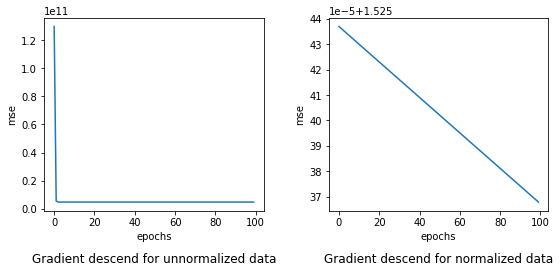

In [ ]:
fig = plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.plot(epochs1, costs1)
ax2.plot(epochs2, costs2)
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.set_title('Gradient descend for unnormalized data', y=-0.3)
ax2.set_xlabel('epochs')
ax2.set_ylabel('mse')
ax2.set_title('Gradient descend for normalized data', y=-0.3)
plt.tight_layout()
plt.show()

**Задание 8.** Реализуйте  функции  потерь  MSE  и  градиентного  спуска  для  случая многомерной линейной регрессии с использованием векторизации.

Векторизованные функции уже реализованы:) Перепишем без векторизации:

In [ ]:
def mult(c, A):
    B = A.copy()
    for i in range(len(A)):
        B[i] = c*A[i]
    return B

def sum_of_els(v):
    s = 0
    for el in v:
        s += el
    return s

def diff(v1, v2):
    n = len(v1)
    d = np.zeros(shape=[n])
    for i in range(n):
        d[i] = v1[i] - v2[i]
    return d

def vect_matr_multiply(v, A):
    v_ = np.zeros(A.shape[1])
    for i in range(A.shape[1]):
        for j in range(A.shape[0]):
            v_[i] += v[j]*A[j][i]
    return v_

def batch_gradient_descend_no_vectors(X, y, epochs, learn_rate=0.01):
    n_features = X.shape[1]
    n_samples = X.shape[0]
    w = np.ones(shape=(n_features))
    b = 0
    for _ in range(epochs):
        y_pred = vect_matr_multiply(w, X.T) + b
        err = diff(y, y_pred)
        w_grad = -mult((2/n_samples), np.dot(X.T, err))
        b_grad = -(2/n_samples) * sum_of_els(err)
        w -= mult(learn_rate, w_grad)
        b -= learn_rate * (b_grad)
    return w, b

**Задание 9.** Покажите, что векторизация дает прирост производительности.

In [ ]:
start = time.time()
batch_gradient_descend_no_vectors(np.array(houses_df_norm.drop(columns='cost')),
                                  np.array(houses_df_norm.cost), epochs=100)
end = time.time()
print(end - start)


start = time.time()
batch_gradient_descend(np.array(houses_df_norm.drop(columns='cost')),
                       np.array(houses_df_norm.cost), epochs=100)
end = time.time()
print('With vectorization:', end - start)

0.02383899688720703
With vectorization: 0.005156278610229492


**Задание 10.** Попробуйте  изменить  параметр  $\eta$ (learning rate).  Как  при этом  изменяется  график  функции  потерь  в  зависимости  от  числа итераций градиентного спуск? Результат изобразите вкачестве графика.

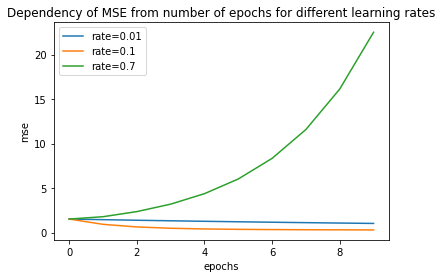

In [ ]:
features = np.array(houses_df_norm.drop(columns='cost'))
target = np.array(houses_df_norm.cost)

rates = [0.01, 0.1, 0.7]
for rate in rates:
    epochs, costs = batch_gradient_descend_logs(features, target, epochs=10, 
                                                learn_rate=rate)
    plt.plot(epochs, costs, label=f'rate={rate}')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.title('Dependency of MSE from number of epochs for different learning rates')
plt.legend()
plt.show()

**Задание 11.** Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.

In [ ]:
def mse_analitic_solution(X, y):
    ones = np.ones(shape=[X.shape[0], 1])
    A = np.concatenate([ones, X], axis=1)
    return np.linalg.inv((A.T.dot(A))).dot(A.T).dot(y)

In [ ]:
features = np.array(houses_df_norm.drop(columns='cost'))
target = np.array(houses_df_norm.cost)

w, b = batch_gradient_descend(features, target, epochs=1000)
print('Gradient descend:', w, b)

bw = mse_analitic_solution(features, target)
w, b = bw[1:], bw[0]
print('Analitic mse solution:', w, b)

model = LinearRegression()
model.fit(features, target)
w, b = model.coef_, model.intercept_
print('Sklearn linear regression:', w, b)

Gradient descend: [ 0.88469804 -0.05311088] -7.434951000016345e-17
Analitic mse solution: [ 0.88476599 -0.05317882] -2.7755575615628914e-17
Sklearn linear regression: [ 0.88476599 -0.05317882] -6.008620172351074e-17
